In [11]:
pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.65.4-cp312-cp312-macosx_10_9_universal2.whl.metadata (3.3 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.met

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [17]:
X_train.shape

(60000, 28, 28)

In [21]:
import matplotlib.pyplot as plt

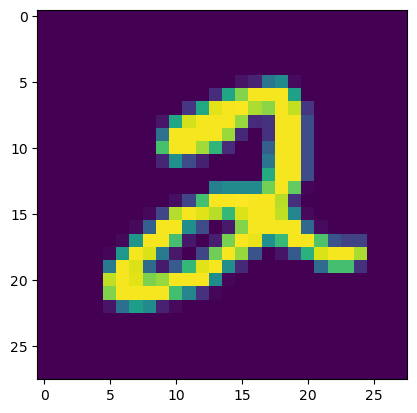

In [27]:
plt.imshow(X_train[5])

In [29]:
y_train[5]

2

In [31]:
X_train = X_train/255

In [33]:
X_test = X_test/255

In [45]:
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=['accuracy'])

In [59]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.9608 - loss: 0.1337 - val_accuracy: 0.9611 - val_loss: 0.1291
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.9734 - loss: 0.0923 - val_accuracy: 0.9689 - val_loss: 0.1001
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.9798 - loss: 0.0665 - val_accuracy: 0.9713 - val_loss: 0.0973
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.9861 - loss: 0.0464 - val_accuracy: 0.9725 - val_loss: 0.0897
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9756 - val_loss: 0.0864
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.9932 - loss: 0.0262 - val_accuracy: 0.9637 - val_loss: 0.1254
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.9930 - loss: 0.0237 - val_accuracy: 0.9750 - val_loss: 0.0906
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.9952 -

In [63]:
y_prob= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


In [67]:
y_pred=  y_prob.argmax(axis=1)

In [71]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.977

In [75]:
plt.plot(history.history['accuracy']
plt.plot(history.history['val_accuracy'])
         

SyntaxError: '(' was never closed (1102619985.py, line 2)